In [16]:
import openai
import pandas as pd
import time
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Verify OpenAI library version
print(f"OpenAI library version: {openai.__version__}")  # Should print 0.28.0

OpenAI library version: 0.28.0


## GPT 3 Turbo

In [18]:
# Load your dataset
print("Loading dataset...")
df_gpt3_5 = pd.read_csv(r"C:\Users\monbi\OneDrive\Documents\BSE\Term 3\Masters Thesis\ECB_Perceived_Cacophony\Scraped_Data\ecb_monetary_policy_decisions.csv")
print("Dataset loaded successfully.")

Loading dataset...
Dataset loaded successfully.


In [20]:
# Drop rows where 'Article' is NaN and reset index
print("Cleaning dataset...")
df_gpt3_5.dropna(subset=['Article'], inplace=True)
df_gpt3_5.reset_index(drop=True, inplace=True)
print("Dataset cleaned.")

# Set your OpenAI API key
openai.api_key = 'sk-proj-q4vaD1sfS4JM31othrf0T3BlbkFJCdvyWyHUWXfivw7iteZj'

def classify_and_score_article(article):
    # Formulate the prompt
    prompt = (
        "Classify the following article as 'Dovish' or 'Hawkish' and provide a score between -1 and 1 indicating how dovish or hawkish it is.\n"
        "\n"
        "An article is 'Dovish' if it suggests policies or sentiments that are supportive of economic growth, low interest rates, or monetary easing.\n"
        "An article is 'Hawkish' if it suggests policies or sentiments that are supportive of combating inflation, high interest rates, or monetary tightening.\n"
        "\n"
        "The score should be between -1 and 1 where -1 indicates extremely dovish and 1 indicates extremely hawkish.\n"
        "\n"
        "Article: {}\n"
        "\n"
        "Provide the output in the following format:\n"
        "Classification: [Dovish/Hawkish]\n"
        "Score: [score]\n"
        "Explanation: [Explanation]\n".format(article)
    )
    
    # Call the GPT-3.5-turbo API using the updated method
    while True:
        try:
            response = openai.ChatCompletion.create(
                model="gpt-3.5-turbo",
                messages=[
                    {"role": "system", "content": "You are a financial expert."},
                    {"role": "user", "content": prompt}
                ],
                max_tokens=150  # Adjust max_tokens if needed
            )
            # Extract the classification and score from the response
            result = response['choices'][0]['message']['content'].strip()

            # Extract classification, score, and explanation using regex
            classification = re.search(r"Classification:\s*(Dovish|Hawkish)", result)
            score = re.search(r"Score:\s*(-?\d+\.\d+)", result)
            explanation = re.search(r"Explanation:\s*(.*)", result, re.DOTALL)

            if classification and score and explanation:
                return classification.group(1), score.group(1), explanation.group(1).strip()
            else:
                raise ValueError("Incomplete response from API")

        except openai.error.RateLimitError:
            print("Rate limit exceeded. Retrying in 10 seconds...")
            time.sleep(10)
        except openai.error.APIError as e:
            print(f"API error: {e}. Retrying in 10 seconds...")
            time.sleep(10)
        except Exception as e:
            print(f"Unexpected error: {e}. Skipping this article.")
            return "Error", "Error", "Error"

# Initialize new columns
df_gpt3_5['Classification'] = ""
df_gpt3_5['Score'] = ""
df_gpt3_5['Explanation'] = ""

# Classify and score each article in the dataset
print("Classifying and scoring articles...")
for i, article in enumerate(df_gpt3_5['Article']):
    classification, score, explanation = classify_and_score_article(article)
    df_gpt3_5.loc[i, 'Classification'] = classification
    df_gpt3_5.loc[i, 'Score'] = score
    df_gpt3_5.loc[i, 'Explanation'] = explanation
    if (i + 1) % 10 == 0 or (i + 1) == len(df_gpt3_5):
        print(f"Processed {i + 1} of {len(df_gpt3_5)} articles.")

# Display the first few rows of the updated dataframe
print("Classification and scoring completed for monetary policy statements. Here are the first few results:")
df_gpt3_5


Cleaning dataset...
Dataset cleaned.
Classifying and scoring articles...
Processed 10 of 31 articles.
Unexpected error: Incomplete response from API. Skipping this article.
Processed 20 of 31 articles.
Processed 30 of 31 articles.
Processed 31 of 31 articles.
Classification and scoring completed for monetary policy statements. Here are the first few results:


,Date,Title,Link,Article,Classification,Score,Explanation
0,11 April 2024,MONETARY POLICY DECISION,https://www.ecb.europa.eu//press/pr/date/2024/...,The Governing Council today decided to keep th...,Hawkish,0.7,The article indicates a hawkish stance by emph...
1,7 March 2024,MONETARY POLICY DECISION,https://www.ecb.europa.eu//press/pr/date/2024/...,The Governing Council today decided to keep th...,Hawkish,0.6,The article suggests a hawkish sentiment by in...
2,25 January 2024,MONETARY POLICY DECISION,https://www.ecb.europa.eu//press/pr/date/2024/...,The Governing Council today decided to keep th...,Hawkish,0.8,The article suggests a hawkish stance by empha...
3,14 December 2023,MONETARY POLICY DECISION,https://www.ecb.europa.eu//press/pr/date/2023/...,The Governing Council today decided to keep th...,Hawkish,0.7,The article suggests a hawkish tone by emphasi...
4,26 October 2023,MONETARY POLICY DECISION,https://www.ecb.europa.eu//press/pr/date/2023/...,The Governing Council today decided to keep th...,Hawkish,0.7,The article suggests a hawkish stance as it em...
5,14 September 2023,MONETARY POLICY DECISION,https://www.ecb.europa.eu//press/pr/date/2023/...,Inflation continues to decline but is still ex...,Hawkish,1.0,The article clearly indicates a hawkish stance...
6,27 July 2023,MONETARY POLICY DECISION,https://www.ecb.europa.eu//press/pr/date/2023/...,Inflation continues to decline but is still ex...,Hawkish,0.8,The article indicates a hawkish stance by ment...
7,27 July 2023,MONETARY POLICY DECISION,https://www.ecb.europa.eu//press/pr/date/2023/...,Inflation continues to decline but is still ex...,Hawkish,0.8,The article suggests a hawkish stance by highl...
8,15 June 2023,MONETARY POLICY DECISION,https://www.ecb.europa.eu//press/pr/date/2023/...,Inflation has been coming down but is projecte...,Hawkish,0.6,The article indicates a hawkish sentiment as i...
9,4 May 2023,MONETARY POLICY DECISION,https://www.ecb.europa.eu//press/pr/date/2023/...,The inflation outlook continues to be too high...,Hawkish,0.8,The article suggests a hawkish stance towards ...


In [21]:
# Optionally, save the results to a new Excel file
output_file = 'classified_articles_gpt3turbo.xlsx'
df_gpt3_5.to_excel(output_file, index=False)
print(f"Results saved to {output_file}")

Results saved to classified_articles_gpt3turbo.xlsx


      Date  Score   Color
2021-01-21   -0.8 #1E90FF
2021-03-11   -0.8 #1E90FF
2021-04-22   -0.8 #1E90FF
2021-06-10   -0.8 #1E90FF
2021-07-22   -0.8 #1E90FF
2021-09-09   -0.8 #1E90FF
2021-10-28   -0.8 #1E90FF
2021-12-16    0.6 #FFD700
2022-02-03   -0.7 #1E90FF
2022-03-10   -0.7 #1E90FF
2022-04-14   -0.5 #1E90FF
2022-06-09    1.0 #FFD700
2022-07-21    1.0 #FFD700
2022-09-08    0.9 #FFD700
2022-09-08    0.8 #FFD700
2022-10-27    0.9 #FFD700
2022-10-27    0.8 #FFD700
2022-12-15    0.9 #FFD700
2023-02-02    0.8 #FFD700
2023-03-16    0.8 #FFD700
2023-05-04    0.8 #FFD700
2023-06-15    0.6 #FFD700
2023-07-27    0.8 #FFD700
2023-07-27    0.8 #FFD700
2023-09-14    1.0 #FFD700
2023-10-26    0.7 #FFD700
2023-12-14    0.7 #FFD700
2024-01-25    0.8 #FFD700
2024-03-07    0.6 #FFD700
2024-04-11    0.7 #FFD700


C:\Users\monbi\AppData\Local\Temp\ipykernel_35184\1381378027.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(


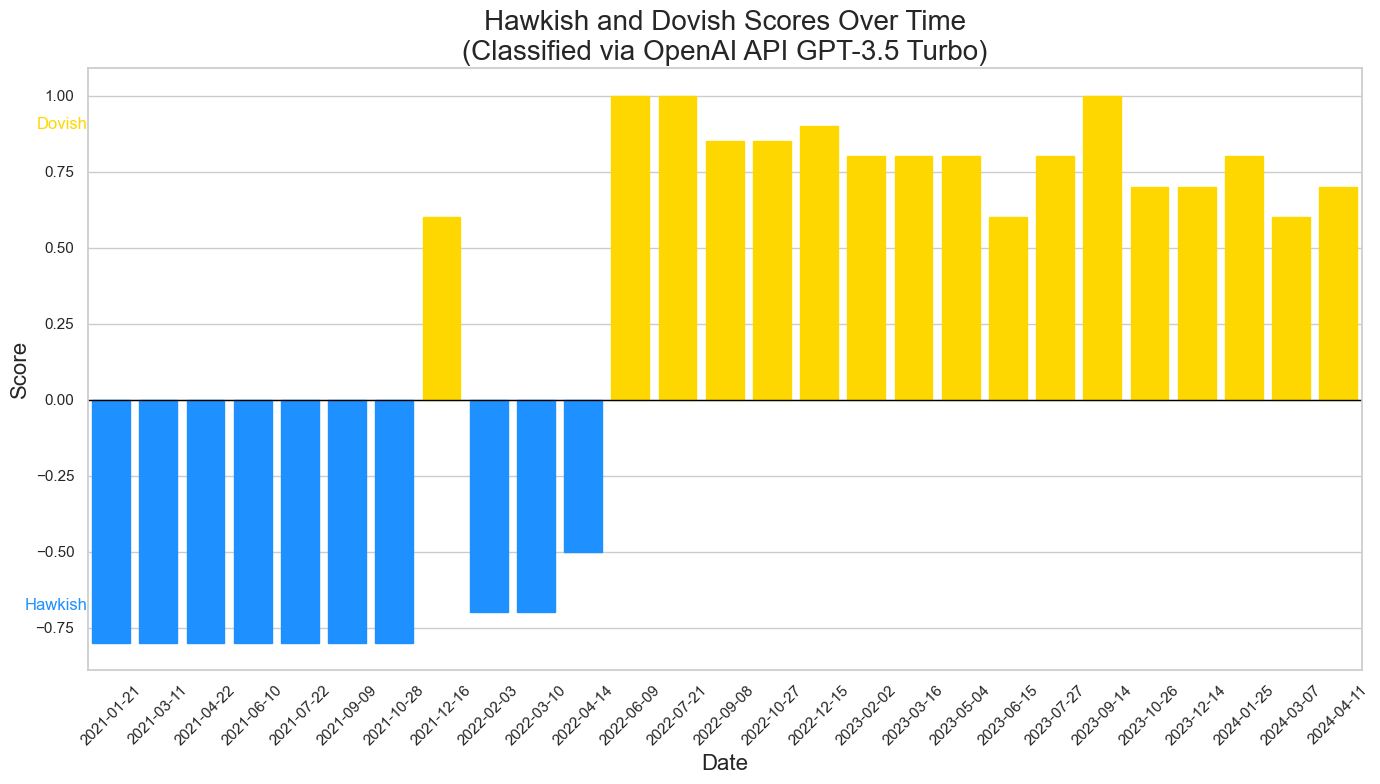

In [22]:
# Convert 'Date' column to datetime
df_gpt3_5['Date'] = pd.to_datetime(df_gpt3_5['Date'])

# Convert 'Score' column to numeric, forcing errors to NaN (we can handle them later if needed)
df_gpt3_5['Score'] = pd.to_numeric(df_gpt3_5['Score'], errors='coerce')

# Drop rows where 'Score' is NaN
df_gpt3_5 = df_gpt3_5.dropna(subset=['Score'])

# Sort data by date
df_gpt3_5 = df_gpt3_5.sort_values(by='Date')

# Set the color palette to match the requested colors (yellow for hawkish and blue for dovish)
def get_color(score):
    return '#FFD700' if score > 0 else '#1E90FF'

df_gpt3_5['Color'] = df_gpt3_5['Score'].apply(get_color)

# Verify the data
print(df_gpt3_5[['Date', 'Score', 'Color']].to_string(index=False))

# Create the seaborn bar plot without the palette argument and set ci=None to remove error bars
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

# Create a bar plot without specifying the palette and removing error bars
bar_plot = sns.barplot(
    x='Date', 
    y='Score', 
    data=df_gpt3_5,
    edgecolor='black',
    ci=None  # Remove error bars
)

# Apply the custom colors using matplotlib
for i, bar in enumerate(bar_plot.patches):
    bar.set_color(df_gpt3_5['Color'].iloc[i])

# Customize the plot
bar_plot.set_title('Hawkish and Dovish Scores Over Time\n(Classified via OpenAI API GPT-3.5 Turbo)', fontsize=20)
bar_plot.set_xlabel('Date', fontsize=16)
bar_plot.set_ylabel('Score', fontsize=16)
bar_plot.axhline(0, color='black', linewidth=1)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add annotations to make the y-axis clear
bar_plot.annotate('Dovish', xy=(0, 0.9), xycoords='axes fraction', fontsize=12, color='#FFD700', ha='right')
bar_plot.annotate('Hawkish', xy=(0, 0.1), xycoords='axes fraction', fontsize=12, color='#1E90FF', ha='right')

# Show the plot
plt.tight_layout()
plt.show()

# GPT 4

In [23]:
# Load your dataset
print("Loading dataset...")
df_gpt_4 = pd.read_csv(r"C:\Users\monbi\OneDrive\Documents\BSE\Term 3\Masters Thesis\ECB_Perceived_Cacophony\Scraped_Data\ecb_monetary_policy_decisions.csv")
print("Dataset loaded successfully.")

Loading dataset...
Dataset loaded successfully.


In [25]:
# Drop rows where 'Article' is NaN and reset index
print("Cleaning dataset...")
df_gpt_4.dropna(subset=['Article'], inplace=True)
df_gpt_4.reset_index(drop=True, inplace=True)
print("Dataset cleaned.")

# Set your OpenAI API key
openai.api_key = 'sk-proj-q4vaD1sfS4JM31othrf0T3BlbkFJCdvyWyHUWXfivw7iteZj'

def classify_and_score_article(article):
    # Formulate the prompt
    prompt = (
        "Classify the following article as 'Dovish' or 'Hawkish' and provide a score between -1 and 1 indicating how dovish or hawkish it is.\n"
        "\n"
        "An article is 'Dovish' if it suggests policies or sentiments that are supportive of economic growth, low interest rates, or monetary easing.\n"
        "An article is 'Hawkish' if it suggests policies or sentiments that are supportive of combating inflation, high interest rates, or monetary tightening.\n"
        "\n"
        "The score should be between -1 and 1 where -1 indicates extremely dovish and 1 indicates extremely hawkish.\n"
        "\n"
        "Article: {}\n"
        "\n"
        "Provide the output in the following format:\n"
        "Classification: [Dovish/Hawkish]\n"
        "Score: [score]\n"
        "Explanation: [Explanation]\n".format(article)
    )
    
    # Call the GPT-4 API using the updated method
    while True:
        try:
            response = openai.ChatCompletion.create(
                model="gpt-4",
                messages=[
                    {"role": "system", "content": "You are a financial expert."},
                    {"role": "user", "content": prompt}
                ],
                max_tokens=150  # Adjust max_tokens if needed
            )
            # Extract the classification and score from the response
            result = response['choices'][0]['message']['content'].strip()

            # Extract classification, score, and explanation using regex
            classification = re.search(r"Classification:\s*(Dovish|Hawkish)", result)
            score = re.search(r"Score:\s*(-?\d+\.\d+)", result)
            explanation = re.search(r"Explanation:\s*(.*)", result, re.DOTALL)

            if classification and score and explanation:
                return classification.group(1), score.group(1), explanation.group(1).strip()
            else:
                raise ValueError("Incomplete response from API")

        except openai.error.RateLimitError:
            print("Rate limit exceeded. Retrying in 10 seconds...")
            time.sleep(10)
        except openai.error.APIError as e:
            print(f"API error: {e}. Retrying in 10 seconds...")
            time.sleep(10)
        except Exception as e:
            print(f"Unexpected error: {e}. Skipping this article.")
            return "Error", "Error", "Error"

# Initialize new columns
df_gpt_4['Classification'] = ""
df_gpt_4['Score'] = ""
df_gpt_4['Explanation'] = ""

# Classify and score each article in the dataset
print("Classifying and scoring articles with GPT-4...")
for i, article in enumerate(df_gpt_4['Article']):
    classification, score, explanation = classify_and_score_article(article)
    df_gpt_4.loc[i, 'Classification'] = classification
    df_gpt_4.loc[i, 'Score'] = score
    df_gpt_4.loc[i, 'Explanation'] = explanation
    if (i + 1) % 10 == 0 or (i + 1) == len(df_gpt_4):
        print(f"Processed {i + 1} of {len(df_gpt_4)} articles.")

# Display the first few rows of the updated dataframe
print("Classification and scoring completed for monetary policy statements with GPT-4. Here are the first few results:")
df_gpt_4


Cleaning dataset...
Dataset cleaned.
Classifying and scoring articles with GPT-4...
Processed 10 of 31 articles.
Processed 20 of 31 articles.
Processed 30 of 31 articles.
Processed 31 of 31 articles.
Classification and scoring completed for monetary policy statements with GPT-4. Here are the first few results:


,Date,Title,Link,Article,Classification,Score,Explanation
0,11 April 2024,MONETARY POLICY DECISION,https://www.ecb.europa.eu//press/pr/date/2024/...,The Governing Council today decided to keep th...,Hawkish,0.7,This article leans towards the hawkish side of...
1,7 March 2024,MONETARY POLICY DECISION,https://www.ecb.europa.eu//press/pr/date/2024/...,The Governing Council today decided to keep th...,Hawkish,0.6,This article has a hawkish tone as it discusse...
2,25 January 2024,MONETARY POLICY DECISION,https://www.ecb.europa.eu//press/pr/date/2024/...,The Governing Council today decided to keep th...,Hawkish,0.7,The provided article leans towards being 'Hawk...
3,14 December 2023,MONETARY POLICY DECISION,https://www.ecb.europa.eu//press/pr/date/2023/...,The Governing Council today decided to keep th...,Hawkish,0.6,The article demonstrates a hawkish stance as i...
4,26 October 2023,MONETARY POLICY DECISION,https://www.ecb.europa.eu//press/pr/date/2023/...,The Governing Council today decided to keep th...,Hawkish,0.7,The article is hawkish as it indicates a stanc...
5,14 September 2023,MONETARY POLICY DECISION,https://www.ecb.europa.eu//press/pr/date/2023/...,Inflation continues to decline but is still ex...,Hawkish,0.7,The article is strongly suggestive of a hawkis...
6,27 July 2023,MONETARY POLICY DECISION,https://www.ecb.europa.eu//press/pr/date/2023/...,Inflation continues to decline but is still ex...,Hawkish,0.7,The article is considerably hawkish because it...
7,27 July 2023,MONETARY POLICY DECISION,https://www.ecb.europa.eu//press/pr/date/2023/...,Inflation continues to decline but is still ex...,Hawkish,0.7,The article mentions a decision to raise key E...
8,15 June 2023,MONETARY POLICY DECISION,https://www.ecb.europa.eu//press/pr/date/2023/...,Inflation has been coming down but is projecte...,Hawkish,0.8,The article clearly communicates the intention...
9,4 May 2023,MONETARY POLICY DECISION,https://www.ecb.europa.eu//press/pr/date/2023/...,The inflation outlook continues to be too high...,Hawkish,0.8,The article reflects hawkish sentiments as it ...


In [26]:
# Optionally, save the results to a new Excel file
output_file = 'classified_articles_gpt4.xlsx'
df_gpt_4.to_excel(output_file, index=False)
print(f"Results saved to {output_file}")

Results saved to classified_articles_gpt4.xlsx


      Date  Score   Color
2021-01-21  -0.90 #1E90FF
2021-03-11  -0.80 #1E90FF
2021-04-22  -0.90 #1E90FF
2021-06-10  -0.80 #1E90FF
2021-07-22  -0.80 #1E90FF
2021-09-09  -0.70 #1E90FF
2021-10-28  -0.70 #1E90FF
2021-12-16   0.30 #FFD700
2022-02-03   0.50 #FFD700
2022-03-10   0.60 #FFD700
2022-04-14   0.70 #FFD700
2022-06-09   0.80 #FFD700
2022-07-21   0.70 #FFD700
2022-07-21   0.80 #FFD700
2022-09-08   0.75 #FFD700
2022-09-08   0.80 #FFD700
2022-10-27   0.80 #FFD700
2022-10-27   0.90 #FFD700
2022-12-15   0.80 #FFD700
2023-02-02   0.80 #FFD700
2023-03-16   0.80 #FFD700
2023-05-04   0.80 #FFD700
2023-06-15   0.80 #FFD700
2023-07-27   0.70 #FFD700
2023-07-27   0.70 #FFD700
2023-09-14   0.70 #FFD700
2023-10-26   0.70 #FFD700
2023-12-14   0.60 #FFD700
2024-01-25   0.70 #FFD700
2024-03-07   0.60 #FFD700
2024-04-11   0.70 #FFD700


C:\Users\monbi\AppData\Local\Temp\ipykernel_35184\2531225099.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(


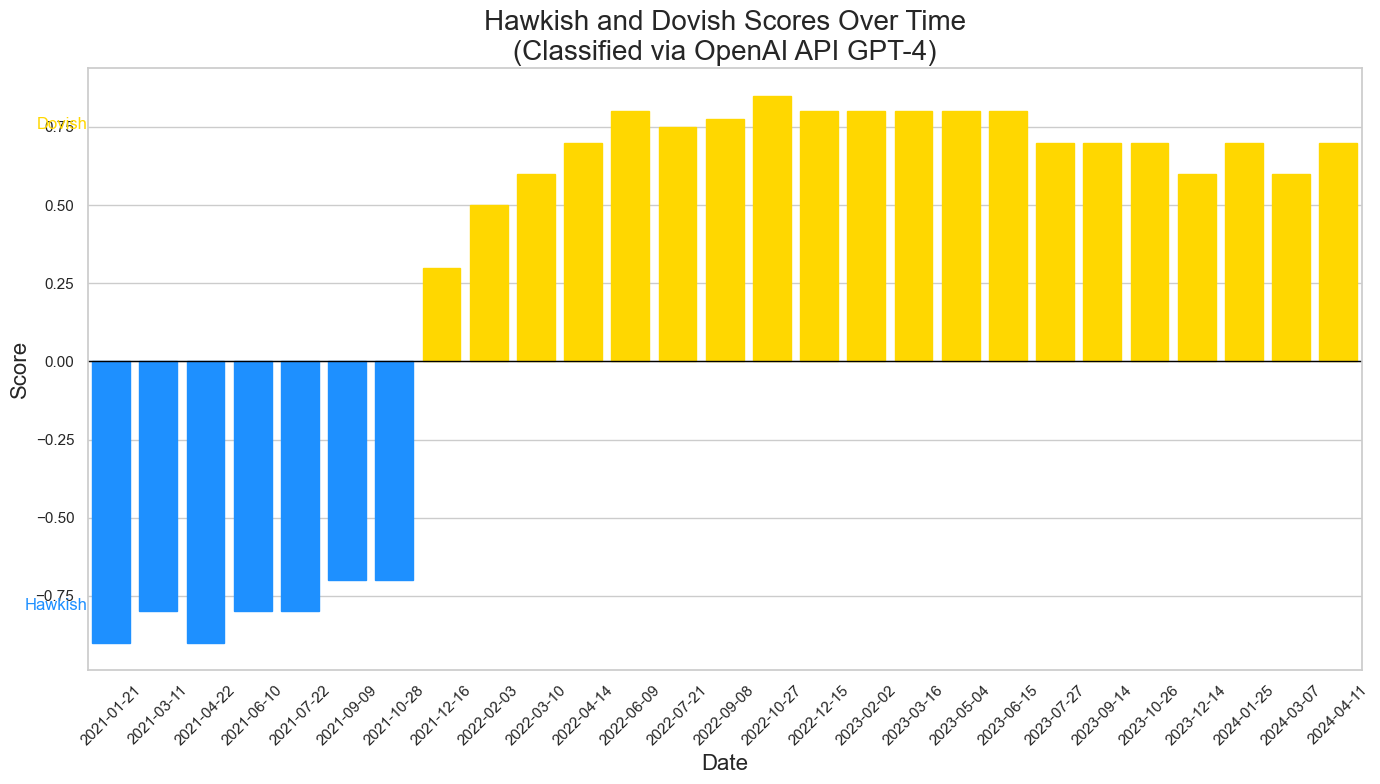

In [27]:
# Convert 'Date' column to datetime
df_gpt_4['Date'] = pd.to_datetime(df_gpt_4['Date'])

# Convert 'Score' column to numeric, forcing errors to NaN (we can handle them later if needed)
df_gpt_4['Score'] = pd.to_numeric(df_gpt_4['Score'], errors='coerce')

# Drop rows where 'Score' is NaN
df_gpt_4 = df_gpt_4.dropna(subset=['Score'])

# Sort data by date
df_gpt_4 = df_gpt_4.sort_values(by='Date')

# Set the color palette to match the requested colors (yellow for hawkish and blue for dovish)
def get_color(score):
    return '#FFD700' if score > 0 else '#1E90FF'

df_gpt_4['Color'] = df_gpt_4['Score'].apply(get_color)

# Verify the data
print(df_gpt_4[['Date', 'Score', 'Color']].to_string(index=False))

# Create the seaborn bar plot without the palette argument and set ci=None to remove error bars
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

# Create a bar plot without specifying the palette and removing error bars
bar_plot = sns.barplot(
    x='Date', 
    y='Score', 
    data=df_gpt_4,
    edgecolor='black',
    ci=None  # Remove error bars
)

# Apply the custom colors using matplotlib
for i, bar in enumerate(bar_plot.patches):
    bar.set_color(df_gpt_4['Color'].iloc[i])

# Customize the plot
bar_plot.set_title('Hawkish and Dovish Scores Over Time\n(Classified via OpenAI API GPT-4)', fontsize=20)
bar_plot.set_xlabel('Date', fontsize=16)
bar_plot.set_ylabel('Score', fontsize=16)
bar_plot.axhline(0, color='black', linewidth=1)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add annotations to make the y-axis clear
bar_plot.annotate('Dovish', xy=(0, 0.9), xycoords='axes fraction', fontsize=12, color='#FFD700', ha='right')
bar_plot.annotate('Hawkish', xy=(0, 0.1), xycoords='axes fraction', fontsize=12, color='#1E90FF', ha='right')

# Show the plot
plt.tight_layout()
plt.show()

### ECB bank rates